In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r"C:\\Users\\Oasis\\Downloads\\insurance2.csv")

df1.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df1.shape

(1338, 8)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
df1.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [7]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


Text(0.5, 1.0, 'Count Plot of age')

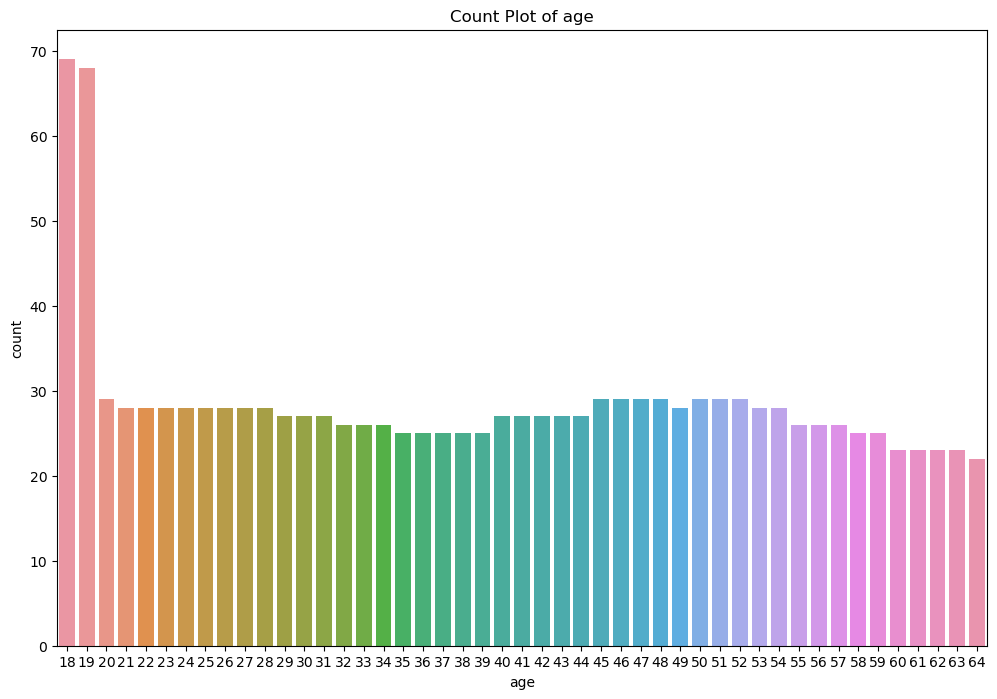

In [8]:
plt.figure(figsize = (12,8))
sns.countplot(x="age",data=df1)
plt.title("Count Plot of age")

In [9]:
df1["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [10]:
df1["region"].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

<AxesSubplot:xlabel='age', ylabel='charges'>

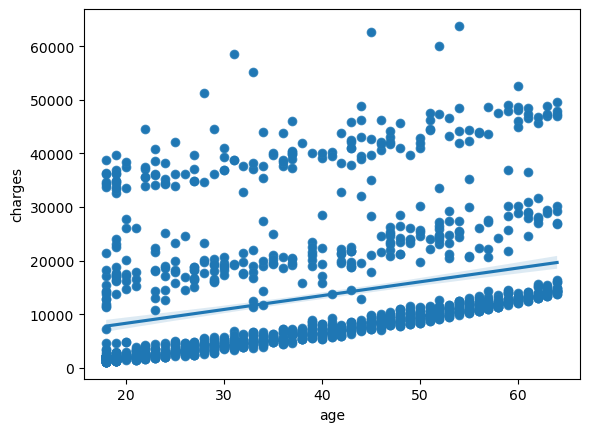

In [11]:
sns.scatterplot(x="age", y="charges",data=df1)
sns.regplot(x="age", y="charges", data = df1)

<AxesSubplot:xlabel='charges', ylabel='Count'>

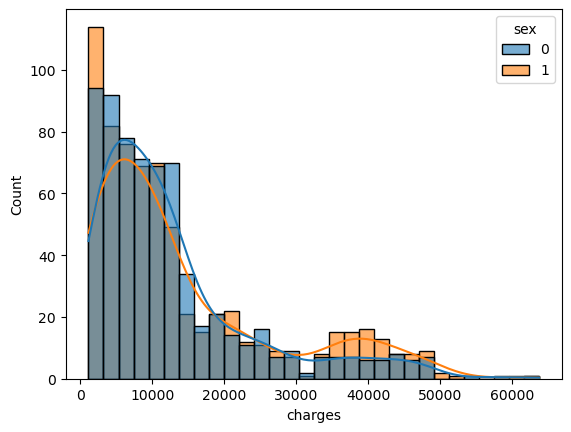

In [12]:
sns.histplot(x='charges',hue='sex', data = df1, kde= True, alpha =0.6, linewidth = 1)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

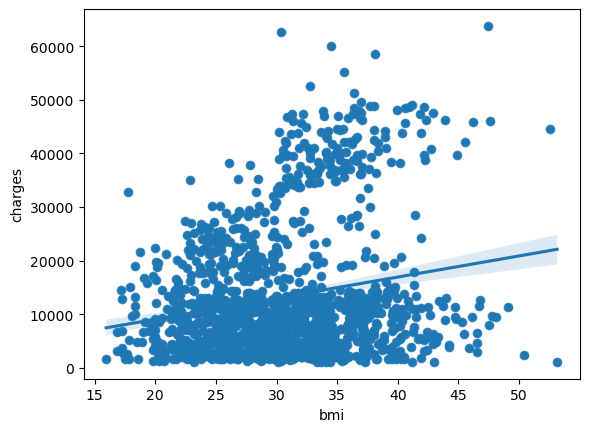

In [13]:
sns.scatterplot(x="bmi", y="charges",data=df1)
sns.regplot(x="bmi", y="charges", data = df1)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

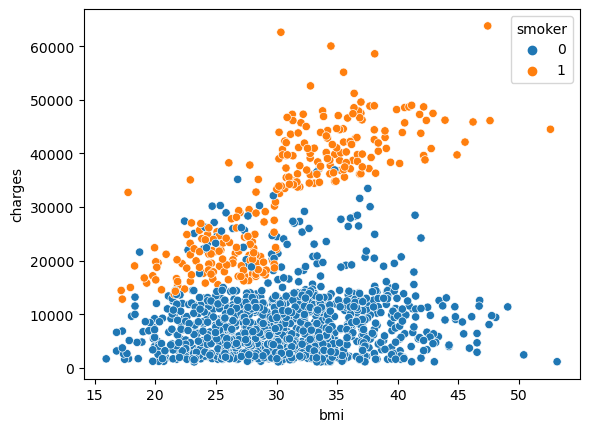

In [14]:
sns.scatterplot(x="bmi", y="charges",data=df1, hue = "smoker")

In [15]:
x = df1.drop(["charges"], axis = 1)
y = df1["charges"]
x, y

(      age  sex     bmi  children  smoker  region  insuranceclaim
 0      19    0  27.900         0       1       3               1
 1      18    1  33.770         1       0       2               1
 2      28    1  33.000         3       0       2               0
 3      33    1  22.705         0       0       1               0
 4      32    1  28.880         0       0       1               1
 ...   ...  ...     ...       ...     ...     ...             ...
 1333   50    1  30.970         3       0       1               0
 1334   18    0  31.920         0       0       0               1
 1335   18    0  36.850         0       0       2               1
 1336   21    0  25.800         0       0       3               0
 1337   61    0  29.070         0       1       1               1
 
 [1338 rows x 7 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     16

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [18]:
model.fit(X_train,Y_train)
model.score(X_train, Y_train)

0.7387882319530937

In [19]:
model.predict(X_test)

array([10339.60663814, 10514.06813009, 38142.68198315, 16152.90411934,
        7452.00658831,  4580.03248321,   859.28051664, 14858.62601236,
        9191.48317813,  7675.10194757,  4290.1838704 ,  9177.26825332,
        9363.4775966 ,  4812.79940623, 27827.36913029,  9778.61438636,
       12096.14424186,  5399.96403263,  8623.66885574, 27142.20146708,
       33041.30453142, 15006.14445677, 11361.03915927, 32465.60957227,
        4025.48369597, 10201.9550997 ,    84.1954765 , 10436.58333439,
        4828.04076048, 10896.19099459,  9142.69566697, 40701.29747159,
       15421.30762038, 13571.83979361, 24411.76442516,  4567.86649829,
       12260.43689394, 30596.50071009, 33190.87191571,  3042.80329326,
        4554.12037411,  3664.63251778, 30467.57216593, 39385.95738347,
       28320.01778517,  5520.25487379,  9655.61181105,  8370.66306826,
        3970.66786553, 11093.87509385,  5340.58993626,  3422.83405135,
       32643.22412019, 38135.48940941, 16402.27912079,  6824.59804158,
      

In [20]:
model.score(X_test, Y_test)

0.801870813883545

In [21]:
X_test

,age,sex,bmi,children,smoker,region,insuranceclaim
578,52,1,30.200,1,0,3,1
610,47,0,29.370,1,0,2,0
569,48,1,40.565,2,1,1,1
1034,61,1,38.380,0,0,1,1
198,51,0,18.050,0,0,1,0
...,...,...,...,...,...,...,...
1084,62,0,30.495,2,0,1,0
726,41,1,28.405,1,0,1,0
1132,57,1,40.280,0,0,0,1
725,30,0,39.050,3,1,2,1


In [23]:
model.predict((np.array([[28, 1, 33.000, 3, 1, 2,0]])))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31466.26336135])

In [27]:
model.coef_

array([ 2.58884903e+02, -2.28754021e+01,  3.72735077e+02,  1.90840597e+02,
        2.41591743e+04, -3.12600513e+02, -1.44278020e+03])

In [28]:
model.intercept_

-12166.391072459724

In [24]:
def prediction(age, sex, bmi, children, smoker, region, insuranceclaim):
    
    X = np.zeros(len(x.columns)).reshape(-1)
    X[0] = age
    X[1] = sex
    X[2] = bmi
    X[3] = children
    X[4] = smoker
    X[5] = region
    X[6] = insuranceclaim
    return model.predict([X][0])

In [25]:
prediction(28, 1, 33.000, 3, 1, 2, 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[28.  1. 33.  3.  1.  2.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.